In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('WildBlueberryPollinationSimulationData (1).csv')
df

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


In [47]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [48]:
df.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [49]:
df = df.drop('Row#',axis=1)

In [50]:
from scipy import stats
# Removing outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
new_df = df[~outliers]
num_outliers_removed = outliers.sum()
print(f"Number of outliers removed: {num_outliers_removed}")

Number of outliers removed: 13


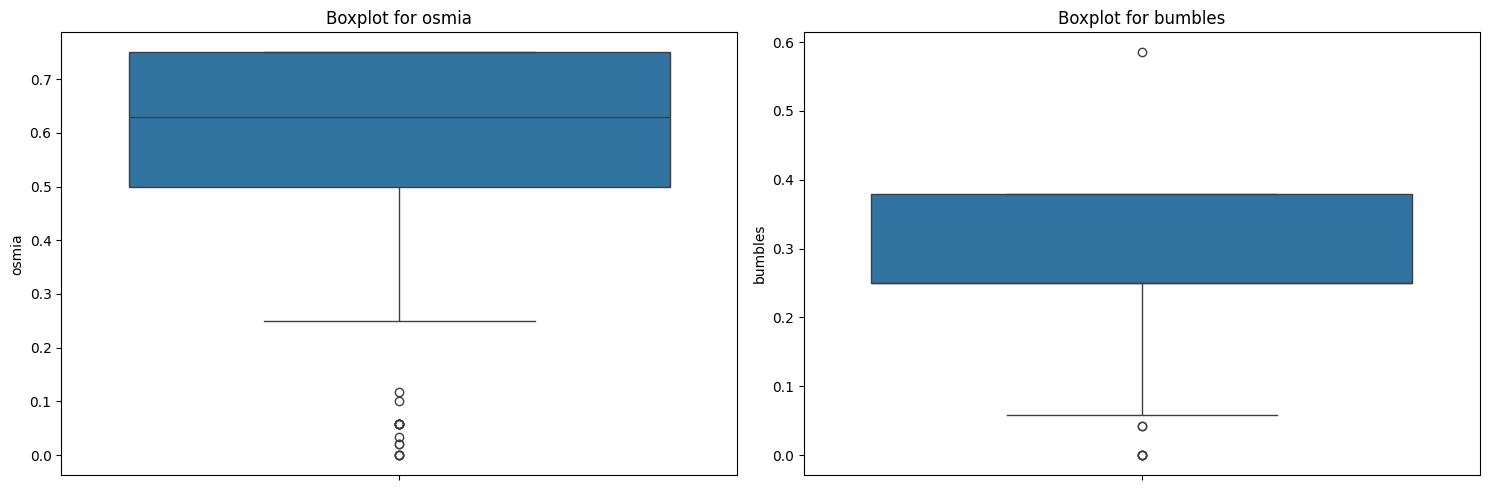

In [51]:
column1 = 'osmia'
column2 = 'bumbles'

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(y= df[column1], ax=axes[0])
axes[0].set_title(f'Boxplot for {column1}')

sns.boxplot(y=df[column2], ax=axes[1])
axes[1].set_title(f'Boxplot for {column2}')

plt.tight_layout()
plt.show()

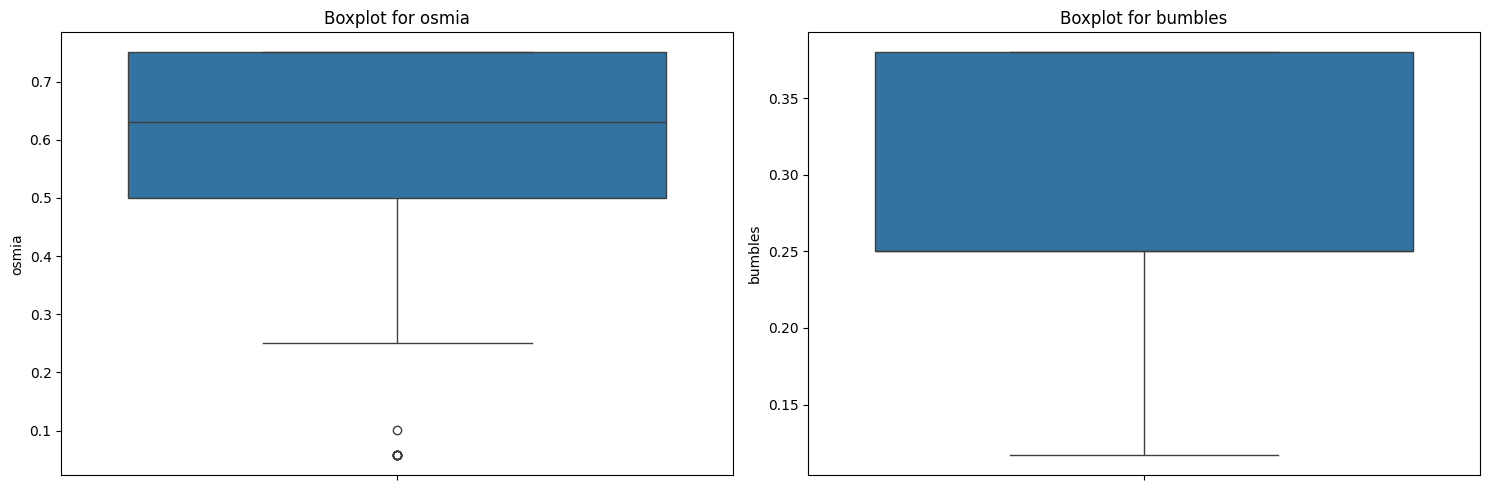

In [52]:
column1 = 'osmia'
column2 = 'bumbles'

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(y= new_df[column1], ax=axes[0])
axes[0].set_title(f'Boxplot for {column1}')

sns.boxplot(y=new_df[column2], ax=axes[1])
axes[1].set_title(f'Boxplot for {column2}')

plt.tight_layout()
plt.show()

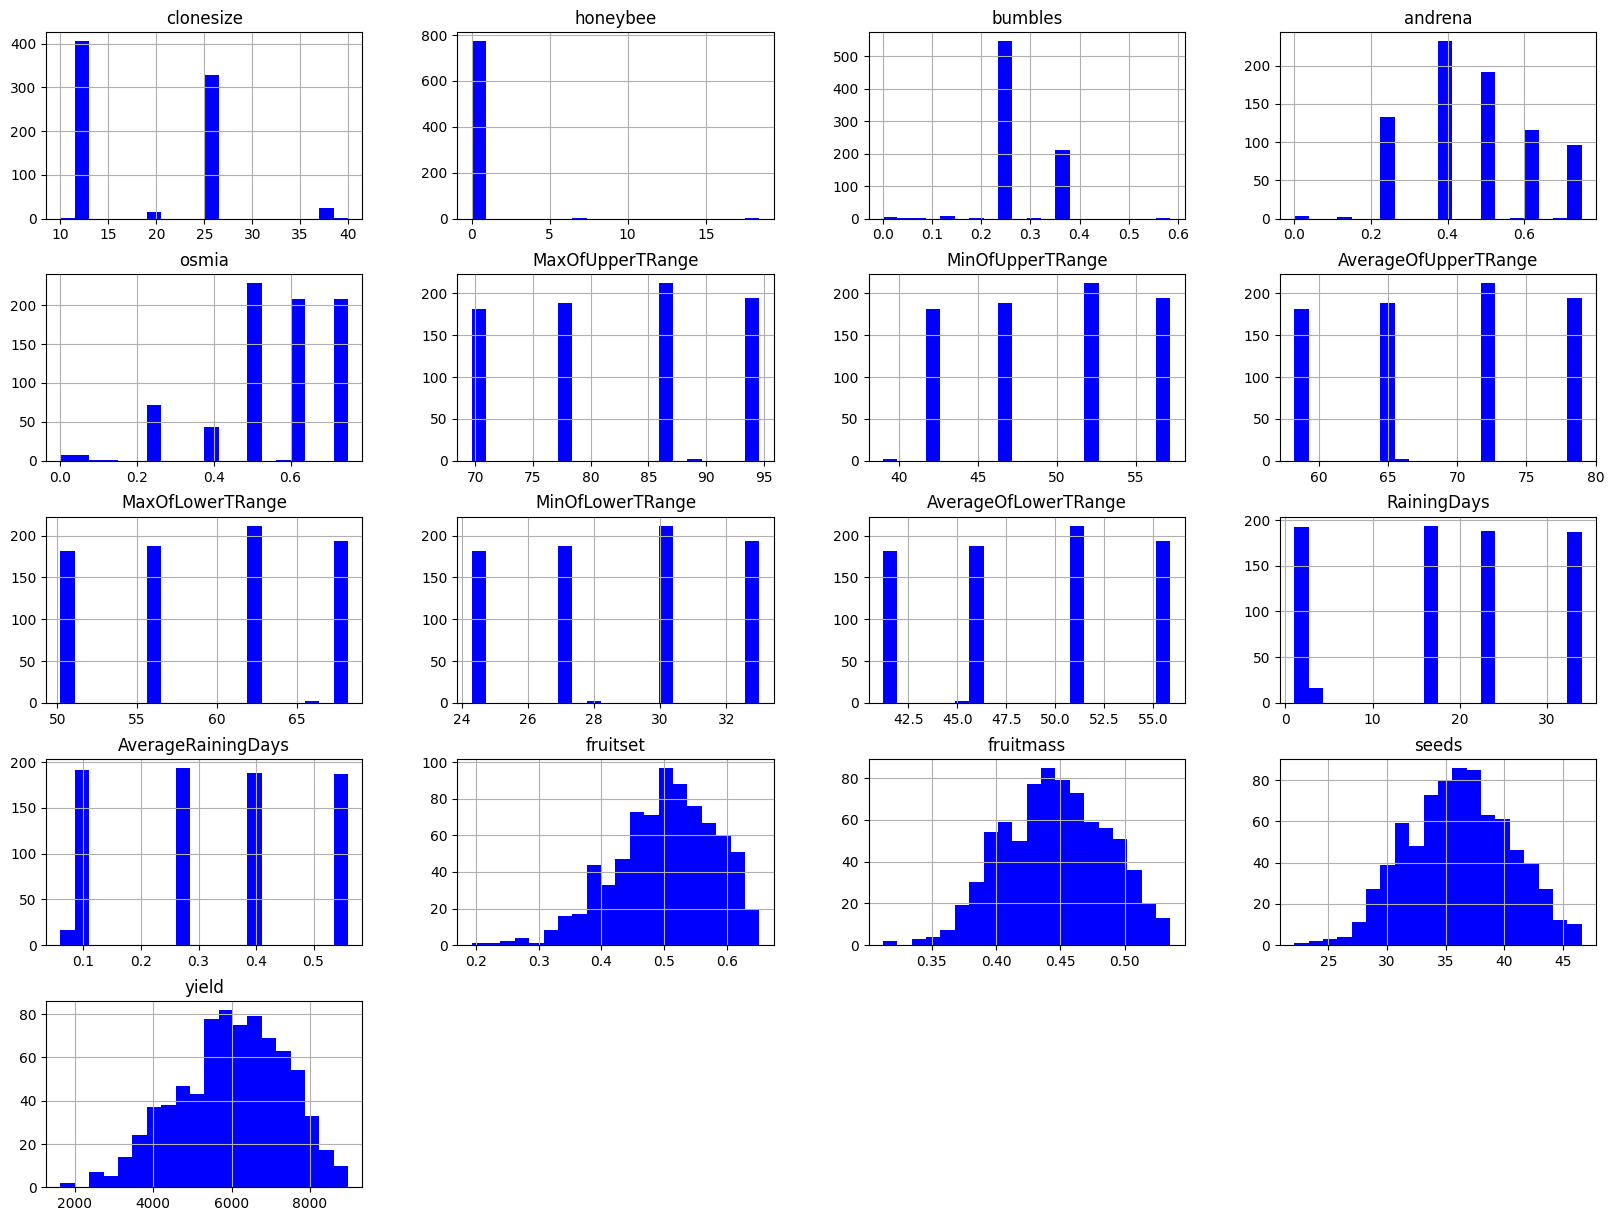

In [11]:
df.hist(layout=(5,4), figsize=(20,15), bins=20, color='blue')
plt.title('histogram of data')
plt.show()

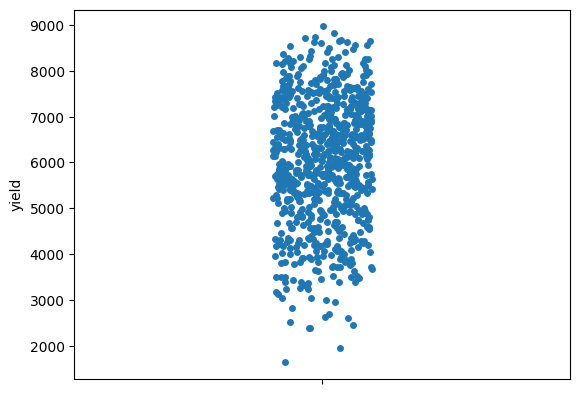

In [12]:
sns.stripplot(y=df['yield']);

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='yield', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.82E-01'}, xlabel='fruitset', ylabel='yield'>,
         <Axes: title={'center': 'F=-5.75E-01'}, xlabel='RainingDays (jittered)'>,
         <Axes: title={'center': 'F=-4.98E-01'}, xlabel='clonesize (jittered)'>,
         <Axes: title={'center': 'F=-3.41E-01'}, xlabel='honeybee (jittered)'>],
        [<Axes: title={'center': 'F=3.15E-01'}, xlabel='osmia (jittered)', ylabel='yield'>,
         <Axes: title={'center': 'F=2.86E-01'}, xlabel='bumbles (jittered)'>,
         <Axes: title={'center': 'F=-1.61E-01'}, xlabel='MaxOfLowerTRange (jittered)'>,
         <Axes: title={'center': 'F=1.23E-01'}, xlabel='andrena (jittered)'>]],
       dtype=object),
 None]

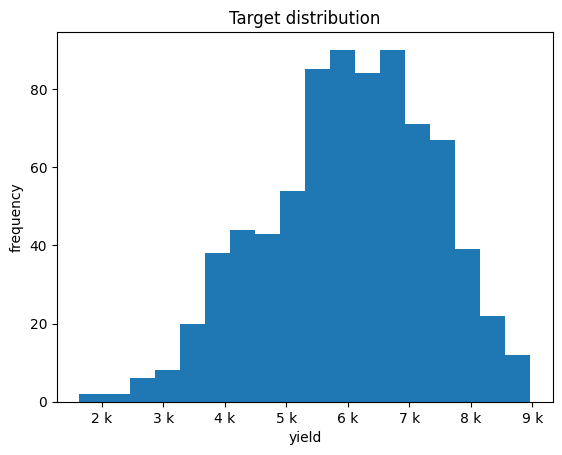

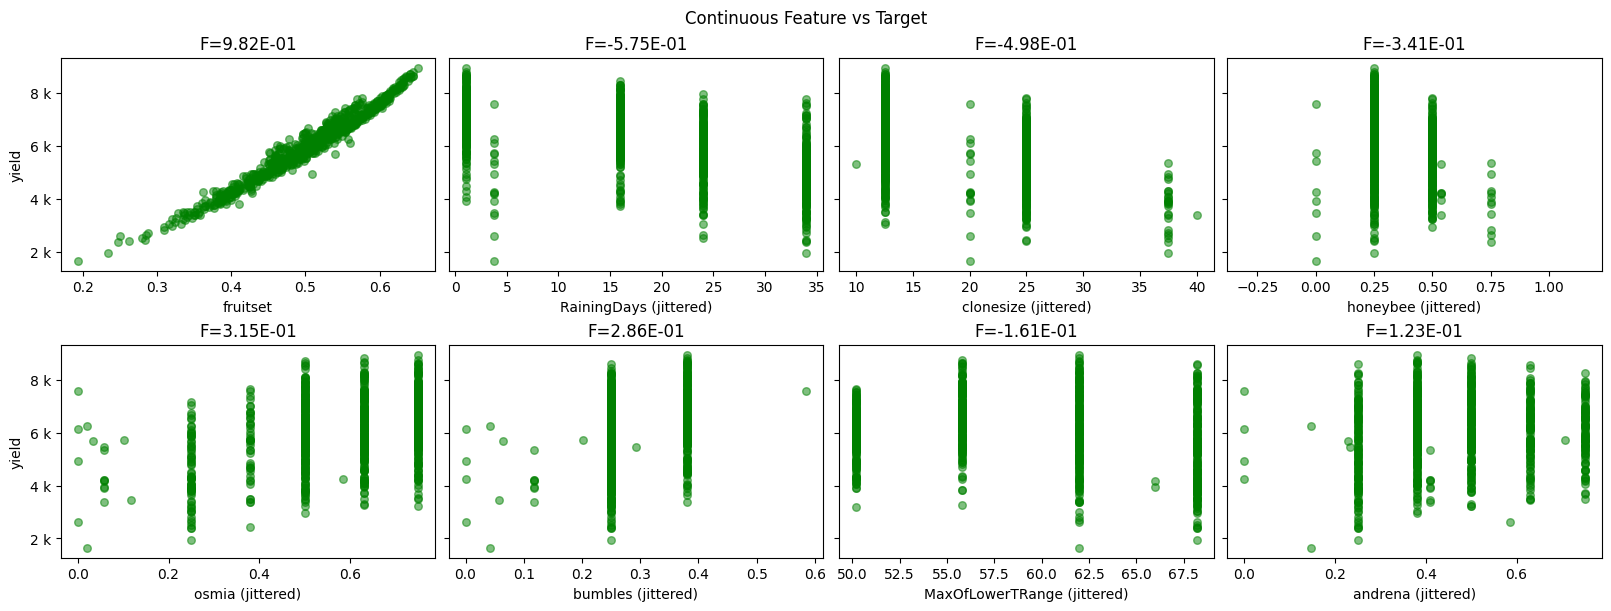

In [13]:
# !pip install dabl
import dabl
dabl.plot(df, target_col='yield',color='green')

<Axes: xlabel='clonesize', ylabel='yield'>

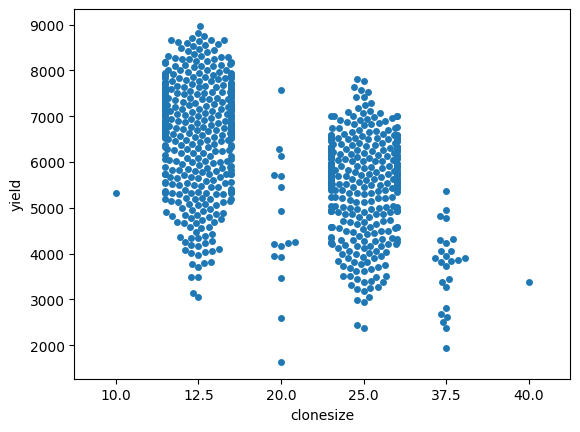

In [14]:
sns.swarmplot(x='clonesize', y='yield', data=df)

<Figure size 2000x2000 with 0 Axes>

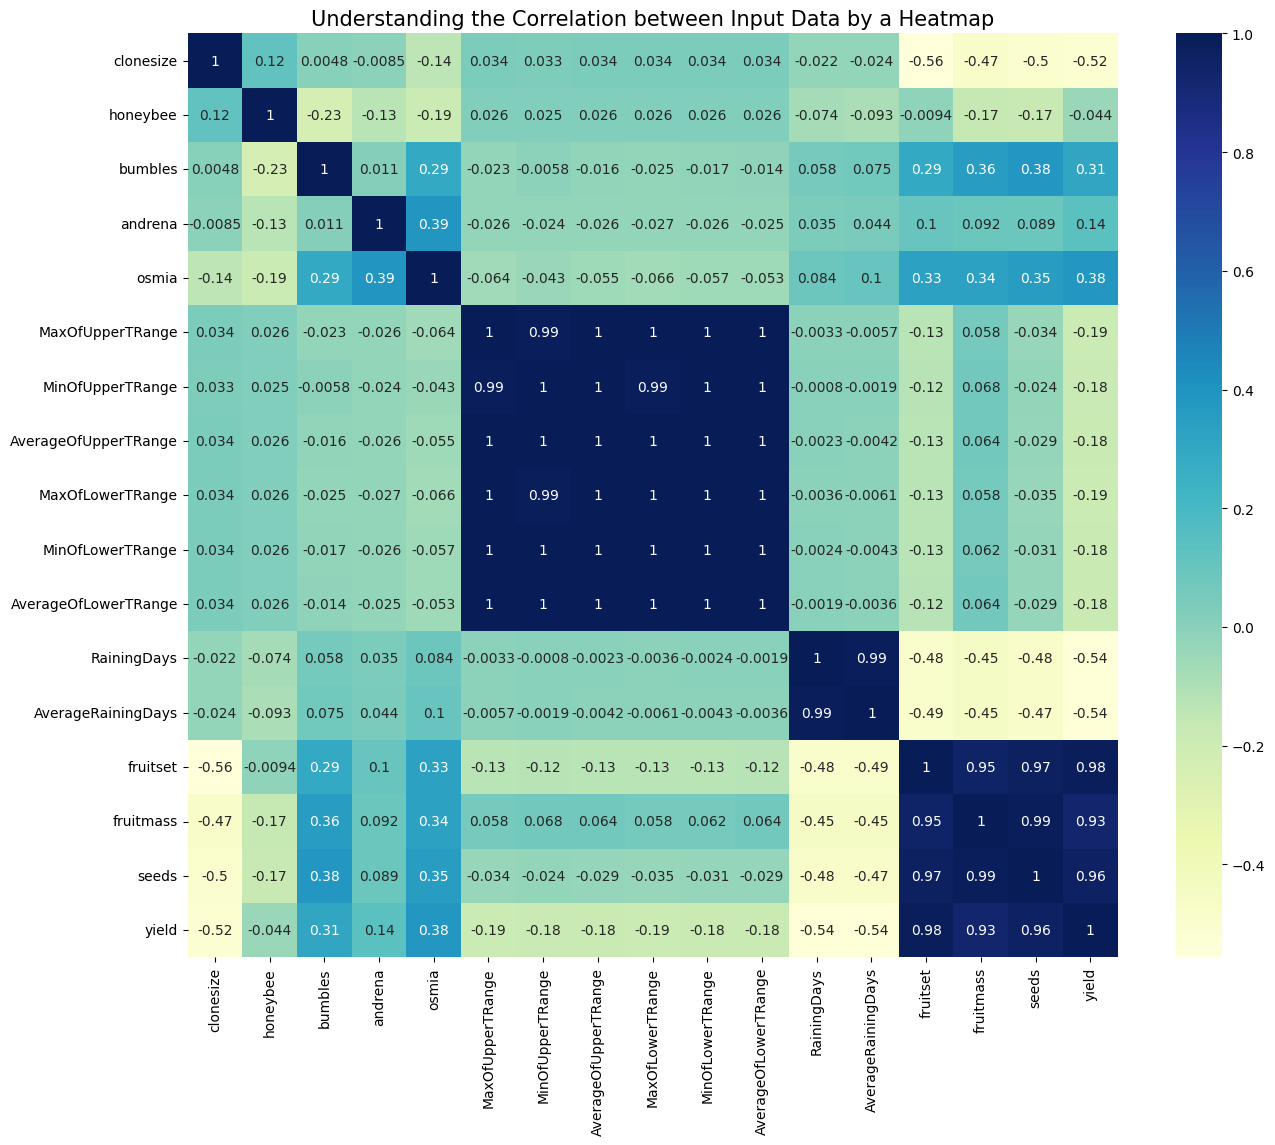

In [15]:
plt.figure(figsize=(20,20))
c = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Understanding the Correlation between Input Data by a Heatmap',fontsize=15)
plt.show();

In [16]:
new_df = new_df.drop(columns=['bumbles','fruitmass','AverageRainingDays','fruitset','MaxOfUpperTRange','MaxOfLowerTRange', 'MinOfLowerTRange'])
new_df.head()

# ALL THE ABOVE COLUMNS HAVE HIGH CORRELATION WITH OTHER COLUMNS, SO THEY ARE BEING REMOVED

,clonesize,honeybee,andrena,osmia,MinOfUpperTRange,AverageOfUpperTRange,AverageOfLowerTRange,RainingDays,seeds,yield
0,37.5,0.75,0.25,0.25,52.0,71.9,50.8,16.0,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,52.0,71.9,50.8,1.0,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,57.2,79.0,55.9,16.0,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,57.2,79.0,55.9,1.0,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,52.0,71.9,50.8,24.0,28.873714,3436.493543


In [17]:
X = new_df.drop('yield',axis=1)
y = new_df['yield']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Importing and building Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

y_preds = model.predict(X_test)

print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_preds))}")       

Regression metrics on the test set
R2 score: 0.9850297685259484
MAE: 111.5204986497179
MSE: 21684.627147497344
RMSE: 147.25701052071287


In [20]:
y_preds

array([5553.49902135, 7392.74693061, 6647.80113106, 8382.40031049,
       6930.64931162, 6352.50676704, 4054.69954309, 7336.83277398,
       6609.80503208, 6745.23976281, 6767.52482335, 4450.5401118 ,
       7684.13956704, 6820.78074249, 7897.18906937, 5745.15287388,
       4580.56903787, 3506.78616555, 6188.04857017, 4991.24250519,
       4965.41679286, 4759.20149474, 6440.9976362 , 6257.32322812,
       4841.56489301, 7516.33865101, 5686.59310825, 7007.30726303,
       4369.53813837, 5578.88677834, 7803.46358844, 5811.01118421,
       5508.85174708, 8089.34918352, 5514.50687125, 6135.55503859,
       4800.35989681, 5363.49717772, 6030.4763171 , 5637.76360793,
       6365.81888218, 6161.63689153, 5264.49014542, 5816.03052381,
       6564.26452154, 7879.89474672, 5716.62723721, 6739.58465965,
       8605.90077224, 6937.05761854, 6558.34682173, 4734.37106468,
       4595.35068669, 6649.03204031, 5976.6099443 , 6035.04701209,
       6080.8727149 , 5005.68841411, 5732.44063613, 6121.89138

In [21]:
yield_comparison = pd.DataFrame({
    'Original yeild':y_test,
    'Predicted yeild': y_preds
})

yield_comparison

,Original yeild,Predicted yeild
360,5527.425034,5553.499021
262,7570.608619,7392.746931
753,6663.000678,6647.801131
196,8357.067222,8382.400310
336,6852.979712,6930.649312
...,...,...
63,5556.372277,5700.256050
554,6595.456285,6346.255211
345,5675.721494,5634.894539
327,6554.976861,6658.005414


In [22]:
# Importing and building the Random forest regressor model
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(X_train,y_train)

y_preds2 = model2.predict(X_test)

print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds2)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds2)}")
print(f"MSE: {mean_squared_error(y_test, y_preds2)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_preds2))}")

Regression metrics on the test set
R2 score: 0.9786564974999222
MAE: 135.726436200327
MSE: 30916.415323176283
RMSE: 175.8306438684005


In [23]:
# Importing and building Decision tree regressor model
from sklearn.tree import DecisionTreeRegressor

model3 = DecisionTreeRegressor()
model3.fit(X_train,y_train)
y_preds3 = model3.predict(X_test)

print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds3)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds3)}")
print(f"MSE: {mean_squared_error(y_test, y_preds3)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_preds3))}")       

Regression metrics on the test set
R2 score: 0.9619595421872434
MAE: 181.7127012156863
MSE: 55102.23042439545
RMSE: 234.73864280172415


In [24]:
# Importing and building XGB Regressor model
from xgboost import XGBRegressor
model4 = XGBRegressor()
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

y_preds4 = model4.predict(X_test)

print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds4)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds4)}")
print(f"MSE: {mean_squared_error(y_test, y_preds4)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_preds4))}")

Regression metrics on the test set
R2 score: 0.982172684010463
MAE: 119.19604783486517
MSE: 25823.161181161377
RMSE: 160.69586547625107


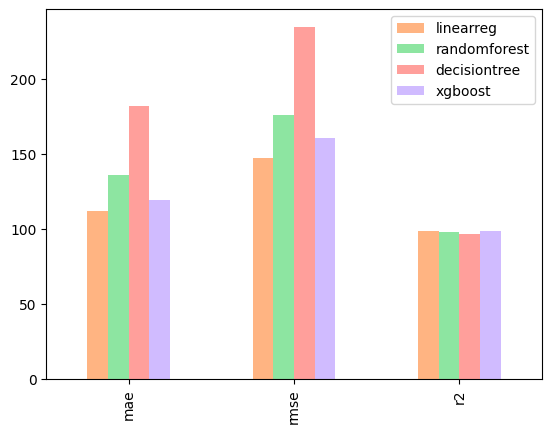

In [25]:
error_rec = {
    "linearreg":{
        "mae": mean_absolute_error(y_test,y_preds),
        "rmse":np.sqrt(mean_squared_error(y_test, y_preds)),
        "r2": r2_score(y_test, y_preds) *100
    },

    "randomforest":{
    "mae": mean_absolute_error(y_test,y_preds2),
    "rmse":np.sqrt(mean_squared_error(y_test, y_preds2)),
    "r2": r2_score(y_test, y_preds2) *100
    },

    "decisiontree":{
    "mae": mean_absolute_error(y_test,y_preds3),
    "rmse":np.sqrt(mean_squared_error(y_test, y_preds3)),
    "r2": r2_score(y_test, y_preds3) *100
    },

    "xgboost":{
    "mae": mean_absolute_error(y_test,y_preds4),
    "rmse":np.sqrt(mean_squared_error(y_test, y_preds4)),
    "r2": r2_score(y_test, y_preds4) *100
    },

}

pd.DataFrame(error_rec).plot(kind="bar",color = [
    sns.color_palette("pastel")[1],
    sns.color_palette("pastel")[2],
    sns.color_palette("pastel")[3],
    sns.color_palette("pastel")[4]
]);

new_df

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [27]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

In [28]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# You can now evaluate the performance of the best model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 23928.954602206504
R-squared: 0.9834803712837439


In [29]:
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Regression metrics on the test set
R2 score: 0.9834803712837439
MAE: 123.25041424676502
MSE: 23928.954602206504
RMSE: 154.68986586782762


In [30]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}


In [31]:
dt = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

In [32]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean Squared Error: 39945.42992962877
R-squared: 0.9724232135369657


In [33]:
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Regression metrics on the test set
R2 score: 0.9724232135369657
MAE: 155.86761325904146
MSE: 39945.42992962877
RMSE: 199.86352826273423


In [34]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


In [35]:
xgb = XGBRegressor()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

In [36]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}
Mean Squared Error: 19206.509150671092
R-squared: 0.9867405657547946


In [37]:
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Regression metrics on the test set
R2 score: 0.9867405657547946
MAE: 108.15756897906451
MSE: 19206.509150671092
RMSE: 138.5875504894689


In [38]:
best_model.score(X_test,y_test)

0.9867405657547946

In [39]:
model.score(X_test, y_test)

0.9850297685259484

In [40]:
new_df.describe()

,clonesize,honeybee,andrena,osmia,MinOfUpperTRange,AverageOfUpperTRange,AverageOfLowerTRange,RainingDays,seeds,yield
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,18.668194,0.356263,0.473292,0.569551,49.640969,68.641099,48.555890,18.437984,36.263019,6046.236614
std,6.944938,0.132262,0.156988,0.158953,5.617130,7.706229,5.437822,12.072542,4.210077,1322.283274
min,10.000000,0.000000,0.234000,0.058000,39.000000,58.200000,41.200000,1.000000,26.054692,2452.680747
25%,12.500000,0.250000,0.380000,0.500000,46.800000,64.700000,45.800000,1.000000,33.280391,5154.078554
50%,12.500000,0.250000,0.500000,0.630000,52.000000,71.900000,50.800000,16.000000,36.255705,6121.585642
75%,25.000000,0.500000,0.630000,0.750000,53.300000,73.675000,52.075000,24.000000,39.333527,7031.850168
max,37.500000,0.750000,0.750000,0.750000,57.200000,79.000000,55.900000,34.000000,46.369344,8969.401842


In [41]:
print(model.predict([[37,0.85,0.40,0.35,52,72,52,16,30.5]]))
print(model.predict([[20,0.34,0.50,0.32,41,67,50,24,33]]))
print(model.predict([[2,8,0.9,1,10,5,9,5,8]]))
print(model.predict([[8,6.5,7,5,9.9,6.2,5.3,8,10]]))
print(model.predict([[25.5,1,0.5,0,40,30,44,30,28]]))

[4386.98503759]
[5465.03422871]
[7483.90078284]
[10591.79073137]
[9985.25257197]


In [42]:
import pickle
pickle.dump(best_model,open('BestModel.pkl','wb'))